# Bike Sharing Service System Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better.
Essentially, The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

## Step 1: Understanding Data

In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [4]:
# data details
day = pd.read_csv("day.csv")

In [5]:
day.shape

(730, 16)

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### No missing values

### Data Cleaning

In [13]:
# Removing the unnecessary column
day.drop(['instant'], axis = 1, inplace = True)
day.drop(['casual'], axis = 1, inplace = True)
day.drop(['registered'], axis = 1, inplace = True)
day.drop(['dteday'], axis = 1, inplace = True)

In [15]:
# 'workingday' and 'holiday' is a repeated information and we can drop the 'holiday' variable
day.drop(['holiday'], axis = 1, inplace = True)

### Mapping Categorical variables

In [18]:
day["season"] = day["season"].map({1: 'spring', 2: 'summer',3: 'fall', 4: 'winter'})
day["weekday"] = day["weekday"].map({0: 'Sunday', 1: 'Monday',2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day["mnth"] = day["mnth"].map({1: 'January', 2: 'February',3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
day["weathersit"] = day["weathersit"].map({1: 'Clear', 2: 'Mist',3: 'Light Rain', 4: 'Heavy Rain'})
day["yr"] = day["yr"].map({0: '2018', 1: '2019'})

In [20]:
day.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data (EDA)

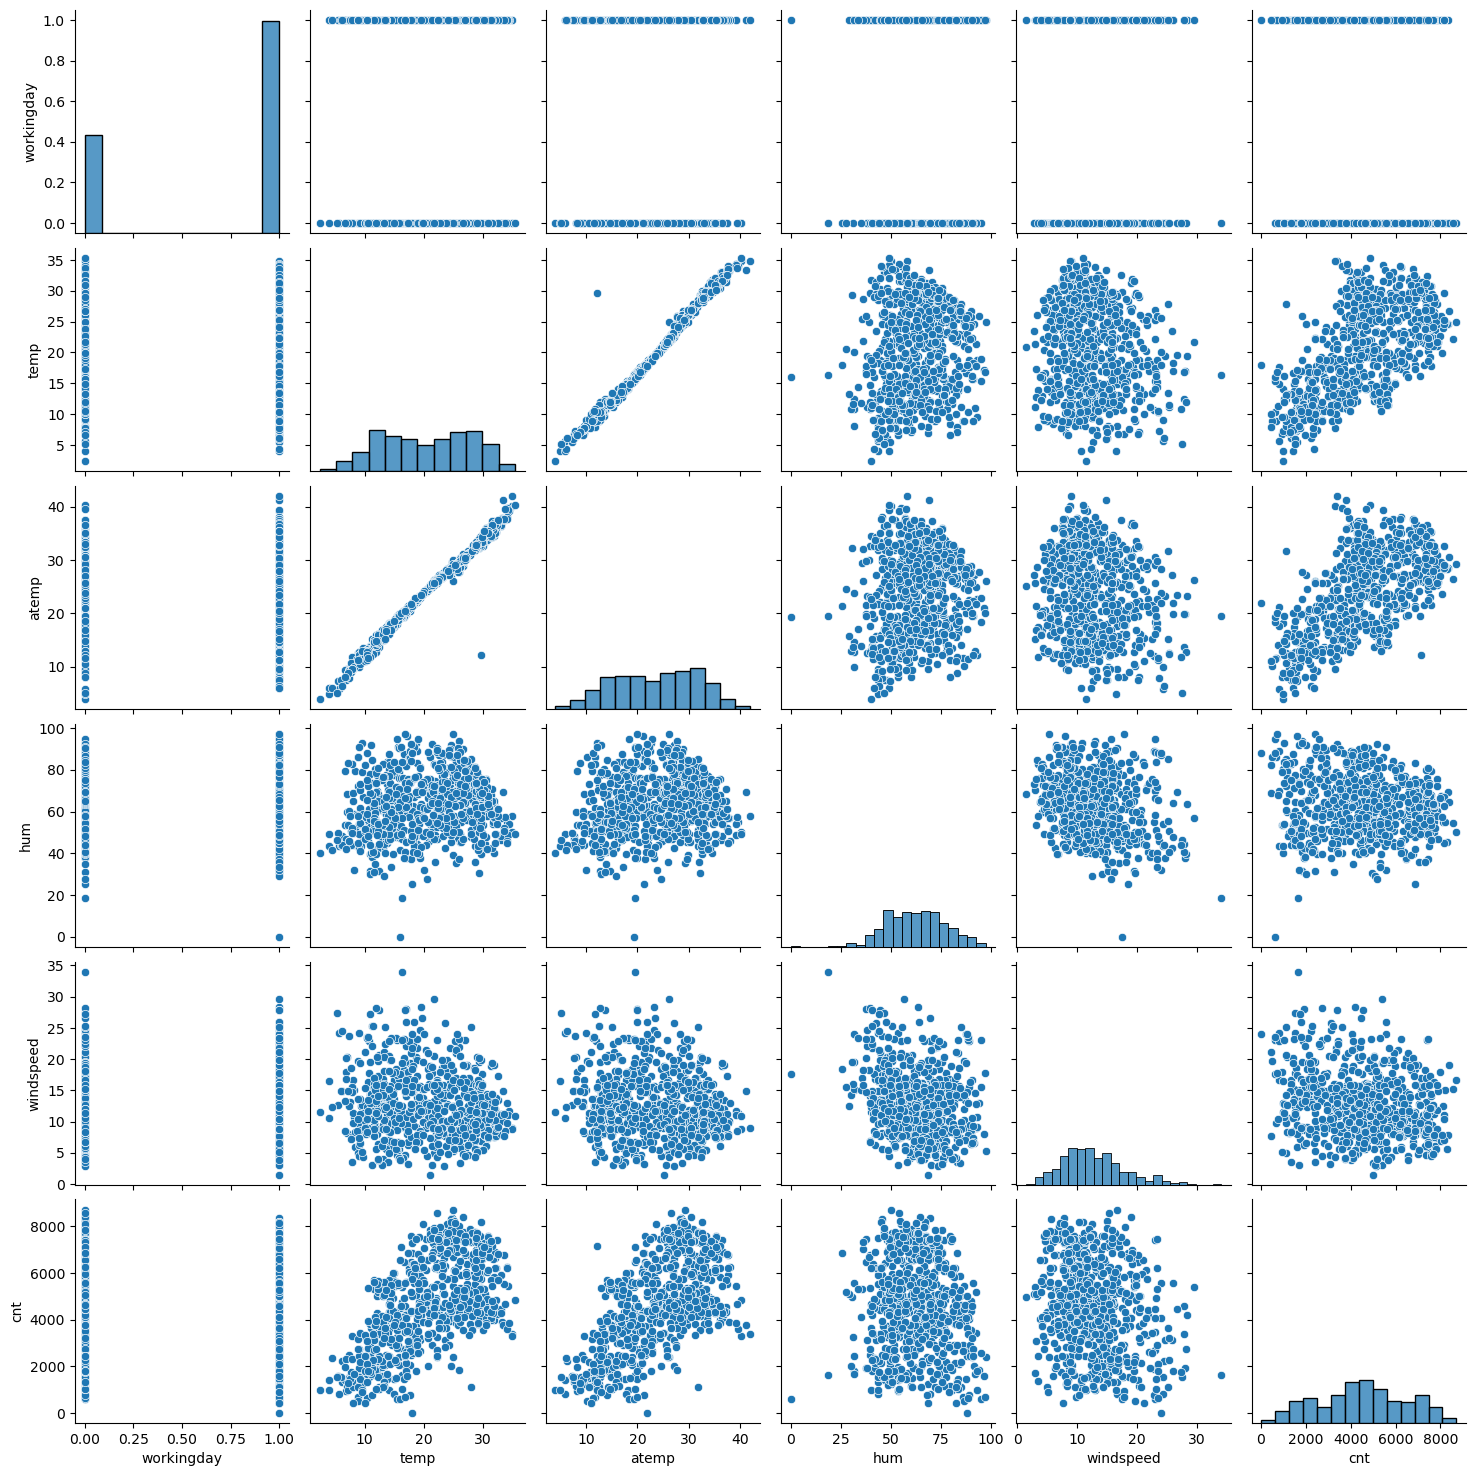

In [23]:
# pairplot of all the variables
sns.pairplot(day)
plt.show()

## Bivariate Analysis

### Visualising Categorical against cnt

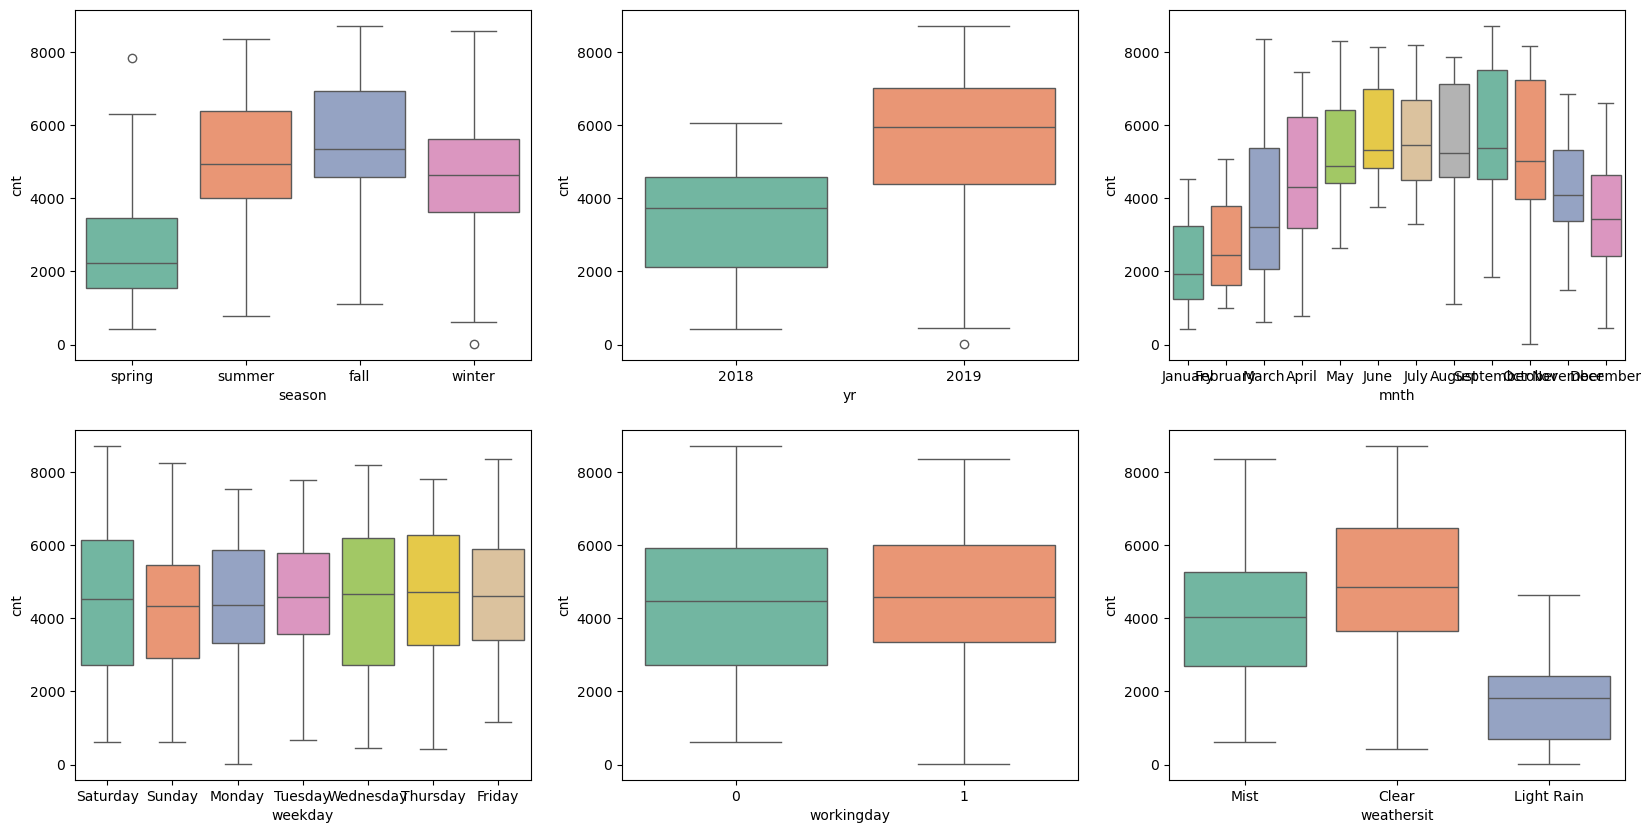

In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day,palette='Set2')
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day,palette='Set2')
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day,palette='Set2')
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day,palette='Set2')
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day,palette='Set2')
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day,palette='Set2')
plt.show()

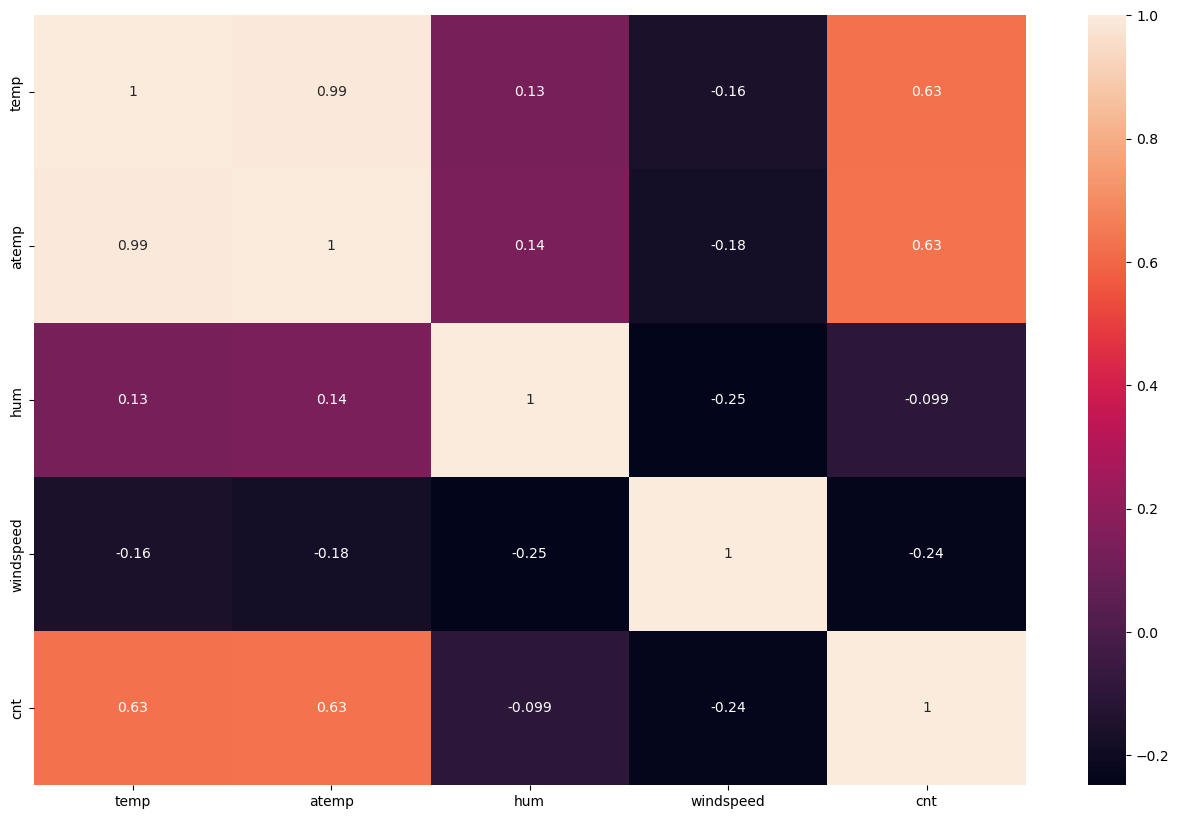

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize = (16, 10))
sns.heatmap(day[num_cols].corr(), annot = True)
plt.show()

## Step 3: Data Preparation

### Dummy Variables

In [33]:
temp = pd.get_dummies(day['season'], dtype=int, drop_first = True)
day = pd.concat([day, temp], axis = 1)
day.drop(['season'], axis = 1, inplace = True)

temp = pd.get_dummies(day['mnth'], dtype=int)
temp = temp.drop('January', axis=1)
day = pd.concat([day, temp], axis = 1)
day.drop(['mnth'], axis = 1, inplace = True)

temp = pd.get_dummies(day['weekday'], dtype=int)
temp = temp.drop('Saturday', axis=1)
day = pd.concat([day, temp], axis = 1)
day.drop(['weekday'], axis = 1, inplace = True)

temp = pd.get_dummies(day['weathersit'], dtype=int)
day = pd.concat([day, temp], axis = 1)
day.drop(['weathersit'], axis = 1, inplace = True)

temp = pd.get_dummies(day['yr'], dtype=int)
temp = temp.drop('2018', axis=1)
day = pd.concat([day, temp], axis = 1)
day.drop(['yr'], axis = 1, inplace = True)

In [35]:
day.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

In [38]:
day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
day_train.shape

(510, 30)

In [42]:
day_test.shape

(219, 30)

### Rescaling the Features 

We will use MinMax scaling.

In [45]:
scaler = MinMaxScaler()

In [47]:
day_train.head()

,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,April,...,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light Rain,Mist,2019
653,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
576,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
426,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
728,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
482,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1


In [49]:
# Apply scaler() to all the numeric columns 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

day_train.head()

,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,April,...,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light Rain,Mist,2019
653,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
576,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
426,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
728,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
482,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1


### Dividing into X and Y sets for the model building

In [52]:
y_train = day_train.pop('cnt')
X_train = day_train

In [54]:
# Check all the columns of the dataframe

day.columns

Index(['workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'April', 'August', 'December', 'February', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Friday',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Clear',
       'Light Rain', 'Mist', '2019'],
      dtype='object')

## Step 5: Building a linear model

In [57]:
#Build a linear model with all the features

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.129616
workingday    0.086273
temp          0.401322
atemp         0.050628
hum          -0.151812
windspeed    -0.184388
spring       -0.048580
summer        0.038216
winter        0.105387
April         0.062565
August        0.078641
December      0.016994
February      0.030389
July          0.023289
June          0.060862
March         0.063853
May           0.087257
November      0.020783
October       0.070260
September     0.144371
Friday       -0.085371
Monday       -0.106872
Sunday       -0.054533
Thursday     -0.095120
Tuesday      -0.104679
Wednesday    -0.091103
Clear         0.149114
Light Rain   -0.107583
Mist          0.088084
2019          0.232208
dtype: float64

In [59]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          8.42e-181
Time:                        00:54:47   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1296      0.034      3.830      0.0

### Automatic Feature Selection by RFE (Recursive feature elimination)
using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [62]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)


rfe = RFE(estimator=lm, n_features_to_select=12)
# running RFE
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', False, 4),
 ('April', False, 7),
 ('August', False, 10),
 ('December', False, 18),
 ('February', False, 14),
 ('July', False, 16),
 ('June', False, 8),
 ('March', False, 6),
 ('May', False, 5),
 ('November', False, 17),
 ('October', False, 11),
 ('September', True, 1),
 ('Friday', False, 3),
 ('Monday', True, 1),
 ('Sunday', False, 13),
 ('Thursday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', False, 2),
 ('Clear', True, 1),
 ('Light Rain', True, 1),
 ('Mist', False, 12),
 ('2019', True, 1)]

In [66]:
col = X_train.columns[rfe.support_]
col

Index(['workingday', 'temp', 'hum', 'windspeed', 'spring', 'September',
       'Monday', 'Thursday', 'Tuesday', 'Clear', 'Light Rain', '2019'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'winter', 'April', 'August', 'December', 'February',
       'July', 'June', 'March', 'May', 'November', 'October', 'Friday',
       'Sunday', 'Wednesday', 'Mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [71]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 

X_train_rfe_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.3
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          2.39e-179
Time:                        00:54:54   Log-Likelihood:                 483.03
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     497   BIC:                            -885.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3128      0.036      8.667      0.0

In [73]:
# Thursday is having high p-value so dropping it
X = X_train_rfe
X = X.drop(['Thursday'], axis = 1)

In [75]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.9
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          2.67e-180
Time:                        00:55:01   Log-Likelihood:                 482.50
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3122      0.036      8.653      0.0

In [77]:
# Tuesday is having high p-value so dropping it
X = X.drop(['Tuesday'], axis = 1)

In [79]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.0
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          3.09e-181
Time:                        00:55:06   Log-Likelihood:                 481.88
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     499   BIC:                            -895.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3133      0.036      8.685      0.0

In [81]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.83
1,temp,10.62
3,windspeed,4.06
0,workingday,3.13
7,Clear,2.86
9,2019,2.05
4,spring,1.92
6,Monday,1.23
5,September,1.16
8,Light Rain,1.13


In [83]:
# hum is having high vif so dropping it
X = X.drop(['hum'], axis = 1)

In [85]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          7.07e-181
Time:                        00:55:21   Log-Likelihood:                 478.16
No. Observations:                 510   AIC:                            -936.3
Df Residuals:                     500   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2309      0.019     11.854      0.0

In [87]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.47
2,windspeed,3.81
0,workingday,2.97
6,Clear,2.76
8,2019,2.04
3,spring,1.62
5,Monday,1.22
4,September,1.15
7,Light Rain,1.09


##### Although VIF of temp is greater than 5, but removing it decreases R-squared from 0.82 to 0.748 which is quite big difference so we will keep the temp as a trade-off

## Residual Analysis of the train data and validating the assumptions

In [91]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

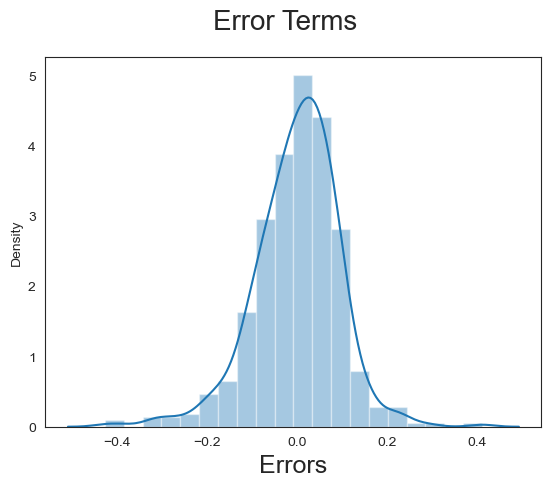

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.set_style("white")
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Error terms are normally distributed

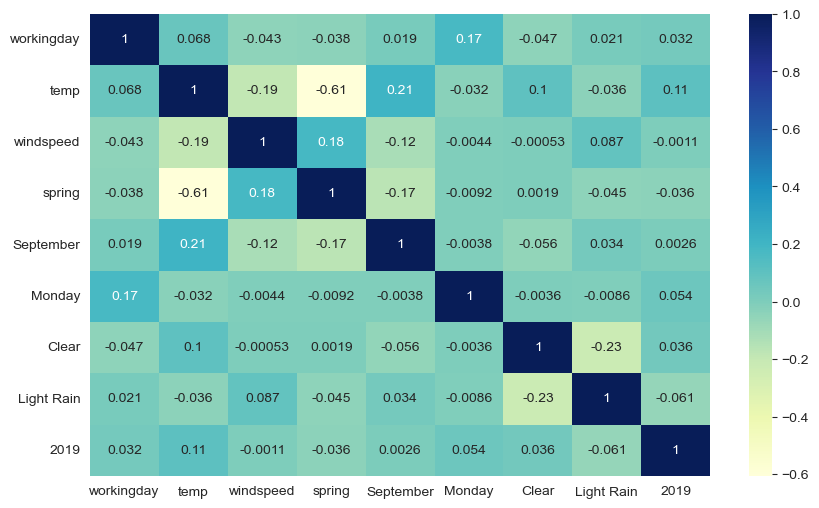

In [96]:

plt.figure(figsize = (10, 6))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [100]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

day_test[num_vars] = scaler.transform(day_test[num_vars])

day_test.head()

,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,April,...,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light Rain,Mist,2019
184,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
535,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
299,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
221,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
152,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


#### Dividing into X_test and y_test

In [103]:
y_test = day_test.pop('cnt')
X_test = day_test

In [105]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test 
# and having the same columns as tarining set
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [107]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

In [110]:
# r2_score
r2_score(y_true = y_test,y_pred = y_pred)

0.8042888816760618

#### We can see that the r2_score is finally 0.8042 on the test set and the final r2_score on the training set was 0.822. 
#### So we have a decent model.